# Challenge ONE 2: Telecom X

## 📌 Extracción

In [1]:
## Imports
import pandas as pd
import json 
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
df = pd.json_normalize(data=json.loads(response.text))
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 🔧 Transformación

### Conocer el conjunto de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
# Verificación de los valores únicos en las columnas para conocer su contenido
for column in df.columns[1:]:
    unique_values = df[column].sort_values().unique()
    if len(unique_values) < 10:
        print(column, '\n',unique_values, '\n')
    else:
        print(column, '\nMin:',min(unique_values), '\t Max:', max(unique_values), '\n')

Churn 
 ['' 'No' 'Yes'] 

customer.gender 
 ['Female' 'Male'] 

customer.SeniorCitizen 
 [0 1] 

customer.Partner 
 ['No' 'Yes'] 

customer.Dependents 
 ['No' 'Yes'] 

customer.tenure 
Min: 0 	 Max: 72 

phone.PhoneService 
 ['No' 'Yes'] 

phone.MultipleLines 
 ['No' 'No phone service' 'Yes'] 

internet.InternetService 
 ['DSL' 'Fiber optic' 'No'] 

internet.OnlineSecurity 
 ['No' 'No internet service' 'Yes'] 

internet.OnlineBackup 
 ['No' 'No internet service' 'Yes'] 

internet.DeviceProtection 
 ['No' 'No internet service' 'Yes'] 

internet.TechSupport 
 ['No' 'No internet service' 'Yes'] 

internet.StreamingTV 
 ['No' 'No internet service' 'Yes'] 

internet.StreamingMovies 
 ['No' 'No internet service' 'Yes'] 

account.Contract 
 ['Month-to-month' 'One year' 'Two year'] 

account.PaperlessBilling 
 ['No' 'Yes'] 

account.PaymentMethod 
 ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check'] 

account.Charges.Monthly 
Min: 18.25 	 Max: 118.75 

ac

**Diccionario de datos del conjunto de datos**

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

### Comprobación de incoherencias en los datos

In [5]:
# Busqueda de valores nulos
for column in df.columns:
    null_values = df[column].isnull().sum()
    if null_values > 0:
        print(column, '-', null_values, '\n')
    else:
        print(column, '-', 'No null values', '\n')

customerID - No null values 

Churn - No null values 

customer.gender - No null values 

customer.SeniorCitizen - No null values 

customer.Partner - No null values 

customer.Dependents - No null values 

customer.tenure - No null values 

phone.PhoneService - No null values 

phone.MultipleLines - No null values 

internet.InternetService - No null values 

internet.OnlineSecurity - No null values 

internet.OnlineBackup - No null values 

internet.DeviceProtection - No null values 

internet.TechSupport - No null values 

internet.StreamingTV - No null values 

internet.StreamingMovies - No null values 

account.Contract - No null values 

account.PaperlessBilling - No null values 

account.PaymentMethod - No null values 

account.Charges.Monthly - No null values 

account.Charges.Total - No null values 



In [6]:
# Busqueda de valores incoherentes en customerID
print(f"Indices duplicados: {len(df[~df['customerID'].isin(df['customerID'])])}")
filtro = df['customerID'].str.match(r'\d{4}\-\D{4}')
print(f"Indices con formato incorrecto: {len(df[~filtro])}")
df['customerID'] = df['customerID'].str.upper().str.strip()

Indices duplicados: 0
Indices con formato incorrecto: 0


In [7]:
# Busqueda de valores incoherentes en Churn
filtro = df['Churn'].isin(['Yes', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")
print("Lista de valores con inconsistencias")
print(df.loc[~filtro, 'Churn'].value_counts())

Indices con valores incoherentes: 224
Lista de valores con inconsistencias
Churn
    224
Name: count, dtype: int64


In [8]:
# Buscando valores inconsistentes en customer.gender
filtro = df['customer.gender'].isin(['Male', 'Female'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [9]:
# Buscando valores inconsistentes en customer.SeniorCitizen
filtro = df['customer.SeniorCitizen'].isin([0, 1])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [10]:
# Buscando valores inconsistentes en customer.Partner
filtro = df['customer.Partner'].isin(['Yes', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [11]:
# Buscando valores inconsistentes en customer.Dependents
filtro = df['customer.Dependents'].isin(['Yes', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [12]:
# Buscando valores inconsistentes en customer.tenure
filtro = df['customer.tenure'] < 0
print(f"Indices con valores incoherentes: {len(df[filtro])}")

Indices con valores incoherentes: 0


In [13]:
# Buscando valores inconsistentes en phone.PhoneService
filtro = df['phone.PhoneService'].isin(['Yes', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [14]:
# Buscando valores inconsistentes en phone.MultipleLines
filtro = df['phone.MultipleLines'].isin(['Yes', 'No', 'No phone service'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [15]:
# Buscando valores inconsistentes en internet.InternetService
filtro = df['internet.InternetService'].isin(['DSL', 'Fiber optic', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [16]:
# Buscando valores inconsistentes en internet.OnlineSecurity
filtro = (~df['internet.OnlineSecurity'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.OnlineSecurity'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")

Indices con valores incoherentes: 0


In [17]:
# Buscando valores inconsistentes en internet.OnlineBackup
filtro = (~df['internet.OnlineBackup'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.OnlineBackup'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")

Indices con valores incoherentes: 0


In [18]:
# Buscando valores inconsistentes en internet.DeviceProtection
filtro = (~df['internet.DeviceProtection'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.DeviceProtection'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")


Indices con valores incoherentes: 0


In [19]:
# Buscando valores inconsistentes en internet.TechSupport
filtro = (~df['internet.TechSupport'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.TechSupport'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")

Indices con valores incoherentes: 0


In [20]:
# Buscando valores inconsistentes en internet.StreamingTV
filtro = (~df['internet.StreamingTV'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.StreamingTV'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")

Indices con valores incoherentes: 0


In [21]:
# Buscando valores inconsistentes en internet.StreamingMovies
#filtro = df['internet.StreamingMovies'].isin(['Yes', 'No', 'No internet service'])
filtro = (~df['internet.StreamingMovies'].isin(['Yes', 'No', 'No internet service'])) | ((df['internet.InternetService'] == 'No') & (df['internet.StreamingMovies'] != 'No internet service'))
print(f"Indices con valores incoherentes: {len(df[filtro])}")


Indices con valores incoherentes: 0


In [22]:
# Buscando valores inconsistentes en account.Contract
filtro = df['account.Contract'].isin(['Month-to-month', 'One year', 'Two year'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [23]:
# Buscando valores inconsistentes en account.PaperlessBilling
filtro = df['account.PaperlessBilling'].isin(['Yes', 'No'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [24]:
# Buscando valores inconsistentes en account.PaymentMethod
filtro = df['account.PaymentMethod'].isin(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'])
print(f"Indices con valores incoherentes: {len(df[~filtro])}")

Indices con valores incoherentes: 0


In [25]:
# Buscando valores inconsistentes en account.Charges.Monthly
print(f"Min. Values: {df['account.Charges.Monthly'].min()}, Max. Values: {df['account.Charges.Monthly'].max()}")

Min. Values: 18.25, Max. Values: 118.75


In [26]:
# Buscando valores inconsistentes en account.Charges.Total
filtro = (~df['account.Charges.Total'].str.match(r"\d+(?:\.\d+)?")) | (df['account.Charges.Total'].isna())
print(f"Indices con valores incoherentes: {len(df[filtro])}")
print("Lista de valores con inconsistencias")
print(df.loc[filtro, 'account.Charges.Total'].value_counts())

Indices con valores incoherentes: 11
Lista de valores con inconsistencias
account.Charges.Total
    11
Name: count, dtype: int64


### Manejo de inconsistencias

In [27]:
# Manejo de valores faltantes para Churn
filtro = df['Churn'].isin(['Yes', 'No'])
df.drop(df[~filtro].index, inplace=True)

In [28]:
# Completar número sin decimales
df['account.Charges.Total'] = df['account.Charges.Total'].replace('\.$', '.0', regex=True)
# Llenar valores sin total
filtro = df['account.Charges.Total'].astype(str).str.match(r'^\d+\.?\d?$')
df.loc[~filtro, 'account.Charges.Total'] = df['customer.tenure'] * df['account.Charges.Monthly']

# Convertir a tipo numérico
df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64)

### Columna cuentas diarias

In [29]:
df['cuentas_diarias'] = df['account.Charges.Monthly'] / 30

### Estandarización y transformación de datos

In [30]:
# Se transforman valores de Yes y No a numéricos
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['customer.Partner'] = df['customer.Partner'].map({'Yes': 1, 'No': 0})
df['customer.Dependents'] = df['customer.Dependents'].map({'Yes': 1, 'No': 0})
df['phone.PhoneService'] = df['phone.PhoneService'].map({'Yes': 1, 'No': 0})
df['account.PaperlessBilling'] = df['account.PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Se transforma el genero de Female y Male a numéricos
df['customer.gender'] = df['customer.gender'].map({'Female': 1, 'Male': 0})

# One Hot Encoding para las columnas categóricas
categorical_columns = ['phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaymentMethod']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=False, dtype=np.int8)

In [31]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'account.PaperlessBilling',
       'account.Charges.Monthly', 'account.Charges.Total', 'cuentas_diarias',
       'phone.MultipleLines_No', 'phone.MultipleLines_No phone service',
       'phone.MultipleLines_Yes', 'internet.InternetService_DSL',
       'internet.InternetService_Fiber optic', 'internet.InternetService_No',
       'internet.OnlineSecurity_No',
       'internet.OnlineSecurity_No internet service',
       'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No',
       'internet.OnlineBackup_No internet service',
       'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No',
       'internet.DeviceProtection_No internet service',
       'internet.DeviceProtection_Yes', 'internet.TechSupport_No',
       'internet.TechSupport_No internet service', 'internet.TechSupport_Yes',
       'internet.Streamin

In [32]:
columnas = ['ID Cliente', 'Abandono', 'Género', 'Veterano', 
            'Casado', 'Dependientes Económicos', 'Antigüedad (meses)',
            'Servicio Telefónico', 'Factura Electrónica',
            'Cargo Mensual', 'Cargo Total', 'Cuentas Diarias', 
            'Multilinea Telefónica: No', 'Multilinea Telefónica: Sin teléfono', 
            'Multilinea Telefónica: Sí', 'Internet: DSL',
            'Internet: Fibra Óptica', 'Internet: No',
            'Seguridad en Linea: No',
            'Seguridad en Linea: Sin Internet',
            'Seguridad en Linea: Sí', 'Respaldo en Linea: No',
            'Respaldo en Linea: Sin Internet',
            'Respaldo en Linea: Sí', 'Protección de Dispositivo: No',
            'Protección de Dispositivo: Sin Internet',
            'Protección de Dispositivo: Sí', 'Soporte Técnico: No',
            'Soporte Técnico: Sin Internet', 'Soporte Técnico: Sí',
            'TV en Streaming: No', 'TV en Streaming: Sin Internet',
            'TV en Streaming: Sí', 'Películas en Streaming: No',
            'Películas en Streaming: Sin Internet',
            'Películas en Streaming: Sí', 'Contrato: Mes a Mes',
            'Contrato: Un Año', 'Contrato: Dos Años',
            'Método de Pago: Transferencia Bancaria',
            'Método de Pago: Tarjeta de crédito',
            'Método de Pago: Cheque electrónico',
            'Método de Pago: Cheque enviado por correo']

df.columns = columnas
df.head()

,ID Cliente,Abandono,Género,Veterano,Casado,Dependientes Económicos,Antigüedad (meses),Servicio Telefónico,Factura Electrónica,Cargo Mensual,...,Películas en Streaming: No,Películas en Streaming: Sin Internet,Películas en Streaming: Sí,Contrato: Mes a Mes,Contrato: Un Año,Contrato: Dos Años,Método de Pago: Transferencia Bancaria,Método de Pago: Tarjeta de crédito,Método de Pago: Cheque electrónico,Método de Pago: Cheque enviado por correo
0,0002-ORFBO,0,1,0,1,1,9,1,1,65.6,...,1,0,0,0,1,0,0,0,0,1
1,0003-MKNFE,0,0,0,0,0,9,1,0,59.9,...,0,0,1,1,0,0,0,0,0,1
2,0004-TLHLJ,1,0,0,0,0,4,1,1,73.9,...,1,0,0,1,0,0,0,0,1,0
3,0011-IGKFF,1,0,1,1,0,13,1,1,98.0,...,0,0,1,1,0,0,0,0,1,0
4,0013-EXCHZ,1,1,1,1,0,3,1,1,83.9,...,1,0,0,1,0,0,0,0,0,1


## 📊 Carga y análisis

### Análisis descriptivo

In [33]:
pd.options.display.max_columns = None

In [34]:
df.shape

(7043, 43)

In [35]:
columnas_numericas = ["Antigüedad (meses)", "Cargo Mensual", "Cargo Total", "Cuentas Diarias"]
df[columnas_numericas].describe().style

,Antigüedad (meses),Cargo Mensual,Cargo Total,Cuentas Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2280.304338,2.158723
std,24.559481,30.090047,2266.609261,1.003002
min,0.000000,18.250000,0.000000,0.608333
25%,9.000000,35.500000,395.850000,1.183333
50%,29.000000,70.350000,1387.000000,2.345000
75%,55.000000,89.850000,3782.650000,2.995000
max,72.000000,118.750000,8684.800000,3.958333


In [36]:
df[[col for col in df.columns[1:] if col not in columnas_numericas]].astype(bool).describe()

,Abandono,Género,Veterano,Casado,Dependientes Económicos,Servicio Telefónico,Factura Electrónica,Multilinea Telefónica: No,Multilinea Telefónica: Sin teléfono,Multilinea Telefónica: Sí,Internet: DSL,Internet: Fibra Óptica,Internet: No,Seguridad en Linea: No,Seguridad en Linea: Sin Internet,Seguridad en Linea: Sí,Respaldo en Linea: No,Respaldo en Linea: Sin Internet,Respaldo en Linea: Sí,Protección de Dispositivo: No,Protección de Dispositivo: Sin Internet,Protección de Dispositivo: Sí,Soporte Técnico: No,Soporte Técnico: Sin Internet,Soporte Técnico: Sí,TV en Streaming: No,TV en Streaming: Sin Internet,TV en Streaming: Sí,Películas en Streaming: No,Películas en Streaming: Sin Internet,Películas en Streaming: Sí,Contrato: Mes a Mes,Contrato: Un Año,Contrato: Dos Años,Método de Pago: Transferencia Bancaria,Método de Pago: Tarjeta de crédito,Método de Pago: Cheque electrónico,Método de Pago: Cheque enviado por correo
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
freq,5174,3555,5901,3641,4933,6361,4171,3653,6361,4072,4622,3947,5517,3545,5517,5024,3955,5517,4614,3948,5517,4621,3570,5517,4999,4233,5517,4336,4258,5517,4311,3875,5570,5348,5499,5521,4678,5431


### Distribución de Evasión

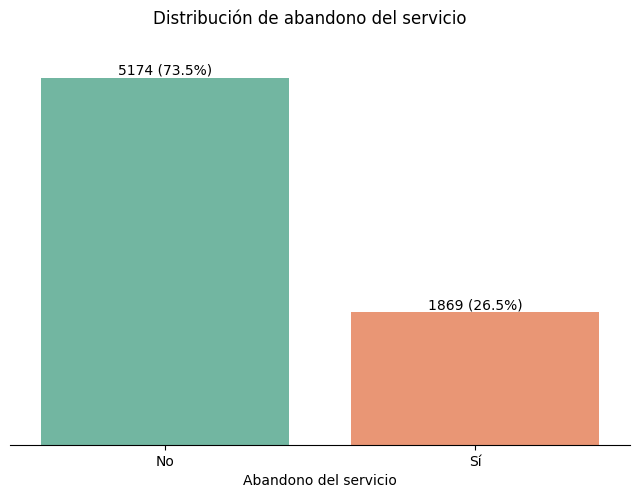

In [37]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Distribución de abandono del servicio')
sns.countplot(data=df, x='Abandono', hue='Abandono', palette='Set2', ax=ax)
ax.set_xlabel('Abandono del servicio')
ax.set_ylabel('')
ax.xaxis.set_ticks([0, 1])
ax.xaxis.set_ticklabels(['No', 'Sí'])
ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks(ticks=[])
ax.legend_.remove()
total = df['Abandono'].count()
for i, j in enumerate(df['Abandono'].value_counts().sort_index()):
    porcentaje = j / total * 100
    ax.text(i, j + 50, f'{j} ({porcentaje:.1f}%)', ha='center')
sns.despine(top=True, left=True, right=True)
plt.savefig(f'figuras/grafico_distribución_abandono.png')
plt.show()

### Recuento de evasíon por variables categóricas

In [ ]:
def graficar_abandono(df, columnas, labels_dict=None, xmin=0, ymax=5000):    
    """
    Grafica la distribución de abandono para múltiples columnas en subplots.

    Args:
        df: DataFrame con los datos completos
        columnas: Lista de columnas a graficar
        labels_dict: Diccionario con etiquetas para cada columna {columna: [label0, label1]}
        xmin: Valor mínimo del eje y
        ymax: Valor máximo del eje y
    """
    n_cols = len(columnas)
    fig, axes = plt.subplots(1, n_cols, figsize=(6*n_cols, 4))
    
    if n_cols == 1:
        axes = [axes]
    
    for idx, columna in enumerate(columnas):
        ax = axes[idx]
        abandono_serie = df.groupby(columna)['Abandono'].value_counts()
        abandono_df = abandono_serie.unstack(level='Abandono').fillna(0).astype(int)
        
        if labels_dict and columna in labels_dict:
            labels = [labels_dict[columna][0] if g == 0 else labels_dict[columna][1] for g in abandono_df.index]
        else:
            labels = ['No' if g == 0 else 'Sí' for g in abandono_df.index]

        x = np.arange(len(abandono_df))
        width = 0.35

        ax.bar(x - width/2, abandono_df.get(0, 0), width, label='No', color='C0')
        ax.bar(x + width/2, abandono_df.get(1, 0), width, label='Sí', color='C1')

        ax.set_title(f'Distribución de abandono por {columna}', fontsize=12)
        ax.set_xlabel(columna, fontsize=10)
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontsize=10)
        ax.set_ylim(bottom=xmin, top=ymax)
        ax.yaxis.set_ticks(ticks=[])
        ax.legend(title='Abandono', fontsize=10)
        
        
        offset = max(abandono_df.values.max() * 0.02, 5)
        for i in range(len(x)):
            val_no = abandono_df.get(0, 0).iloc[i]
            val_si = abandono_df.get(1, 0).iloc[i]
            total = val_no + val_si
            pct_no = val_no / total * 100 if total > 0 else 0
            pct_si = val_si / total * 100 if total > 0 else 0
            ax.text(x[i] - width/2, val_no + offset, f'{val_no} ({pct_no:.1f}%)', ha='center', fontsize=8)
            ax.text(x[i] + width/2, val_si + offset, f'{val_si} ({pct_si:.1f}%)', ha='center', fontsize=8)

        sns.despine(ax=ax, top=True, right=True, left=True)

    plt.tight_layout()
    sns.set_palette('Set2')
    plt.savefig(f'figuras/grafico_abandono_{"_".join(columnas)}.png')
    plt.show()

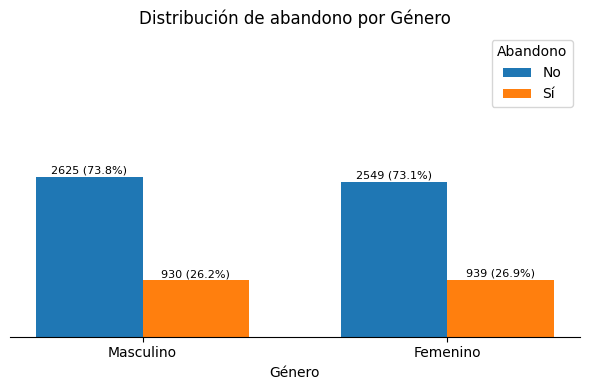

In [39]:
# Distribución de abandono según el genero
graficar_abandono(df, ['Género'], labels_dict={'Género': ['Masculino', 'Femenino']})

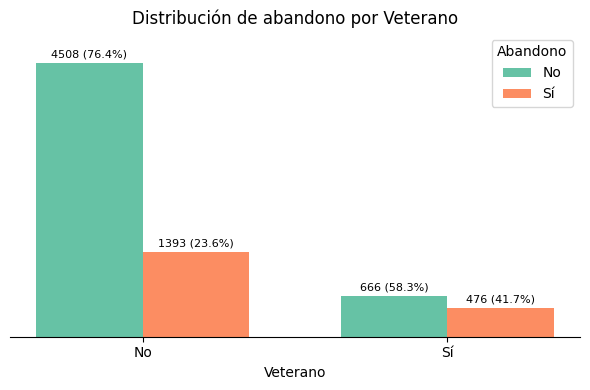

In [40]:
# Distribución de abandono según el veterano
graficar_abandono(df, ['Veterano'], labels_dict={'Veterano': ['No', 'Sí']})

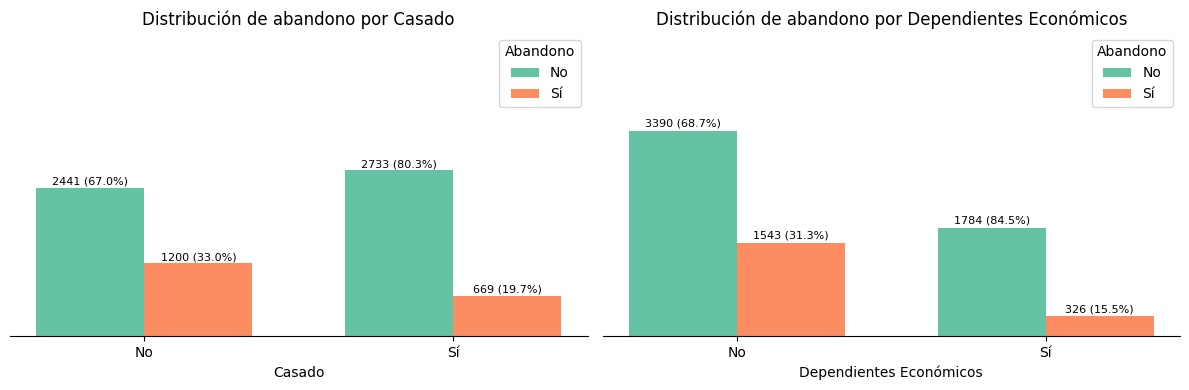

In [41]:
# Distribución de abandono según el estado civil
graficar_abandono(df, ['Casado', 'Dependientes Económicos'], labels_dict={'Estado Civil': ['Soltero', 'Casado']})

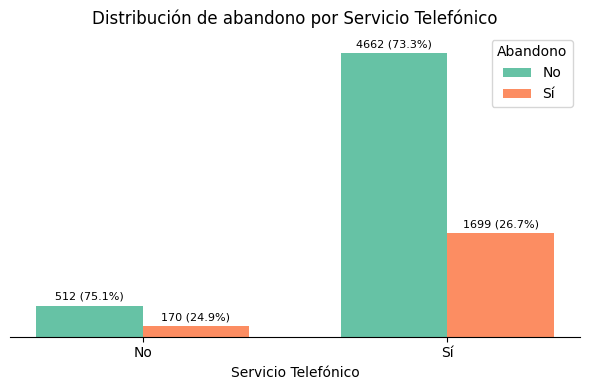

In [46]:
graficar_abandono(df, ['Servicio Telefónico'])

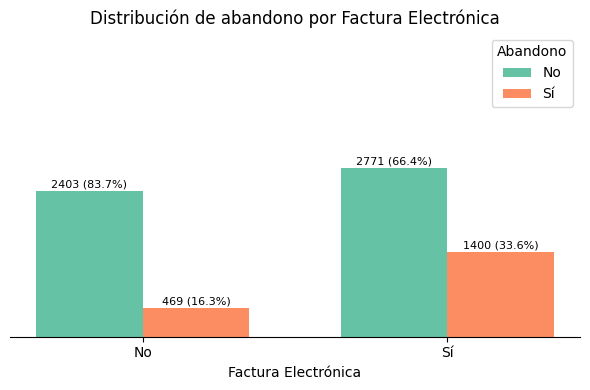

In [47]:
graficar_abandono(df, ['Factura Electrónica'])

In [ ]:
def graficar_abandono_ohe(df, prefijos, titulos, labels_map=None, ymin=0, ymax=5000):
    """
    Grafica abandono para columnas One Hot Encoding con prefijos comunes en subplots.
    
    Args:
        df: DataFrame con los datos
        prefijos: Lista de prefijos de las columnas OHE (ej: ['Multilinea Telefónica', 'Internet'])
        titulos: Lista de títulos para cada subplot
        labels_map: Diccionario opcional para renombrar etiquetas del eje x
        ymin: Valor mínimo del eje y
        ymax: Valor máximo del eje y
    """
    n_plots = len(prefijos)
    n_cols = min(2, n_plots)
    n_rows = (n_plots + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 4*n_rows))
    
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, (prefijo, titulo) in enumerate(zip(prefijos, titulos)):
        ax = axes[idx]
        columnas = df.columns[df.columns.str.startswith(prefijo) | df.columns.isin(['Abandono'])]
        df_subset = df[columnas]
        ohe_cols = [col for col in columnas if col != 'Abandono']
        resultado = {}
        for col in ohe_cols:
            resultado[col] = df_subset[df_subset[col] == 1]['Abandono'].value_counts().sort_index()
        
        conteo_abandono = pd.DataFrame(resultado).T
        conteo_abandono.columns = ['No', 'Sí']
        
        if labels_map and prefijo in labels_map:
            conteo_abandono.index = [labels_map[prefijo].get(col, col) for col in conteo_abandono.index]
        else:
            conteo_abandono.index = [col.replace(f'{prefijo}: ', '') for col in conteo_abandono.index]

        x = np.arange(len(conteo_abandono))
        width = 0.35
        
        ax.bar(x - width/2, conteo_abandono['No'], width=width, label='No')
        ax.bar(x + width/2, conteo_abandono['Sí'], width=width, label='Sí')

        ax.set_title(f'Distribución de abandono por {titulo}', fontsize=14)
        ax.set_xlabel(titulo, fontsize=12)
        ax.set_xticks(x)
        ax.set_xticklabels(conteo_abandono.index, fontsize=10)
        ax.set_ylim(bottom=ymin, top=ymax)
        ax.yaxis.set_ticks(ticks=[])
        ax.legend(title='Abandono', fontsize=10)

        offset = max(conteo_abandono.values.max() * 0.02, 5)
        for i in range(len(x)):
            val_no = conteo_abandono['No'].iloc[i]
            val_si = conteo_abandono['Sí'].iloc[i]
            total = val_no + val_si
            pct_no = val_no / total * 100 if total > 0 else 0
            pct_si = val_si / total * 100 if total > 0 else 0
            ax.text(x[i] - width/2, val_no + offset, f'{val_no} ({pct_no:.1f}%)', ha='center', fontsize=8)
            ax.text(x[i] + width/2, val_si + offset, f'{val_si} ({pct_si:.1f}%)', ha='center', fontsize=8)

        sns.despine(ax=ax, top=True, right=True, left=True)

    # Ocultar ejes vacíos si el número de plots es impar
    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    sns.set_palette('Set2')
    plt.savefig(f'figuras/grafico_abandono_{"_".join(titulos)}.png')
    plt.show()

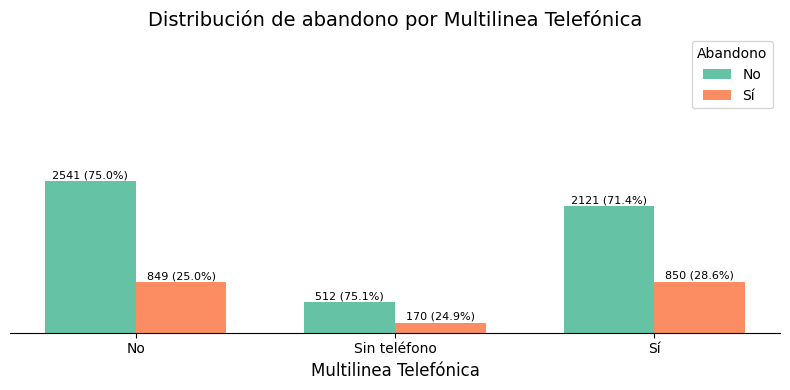

In [65]:
graficar_abandono_ohe(df, ['Multilinea Telefónica'], ['Multilinea Telefónica'])

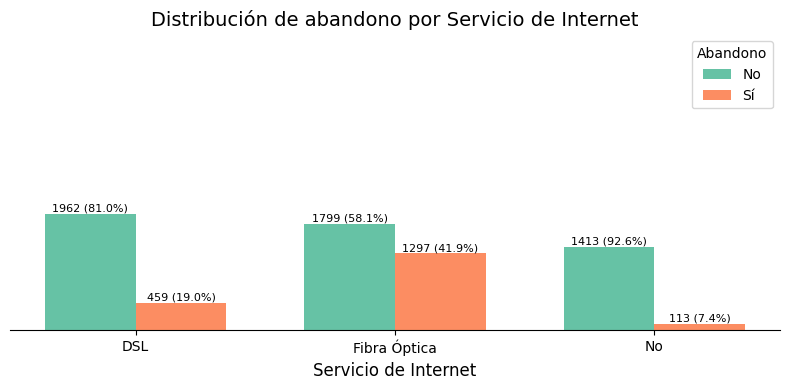

In [66]:
graficar_abandono_ohe(df, ['Internet'], ['Servicio de Internet'])

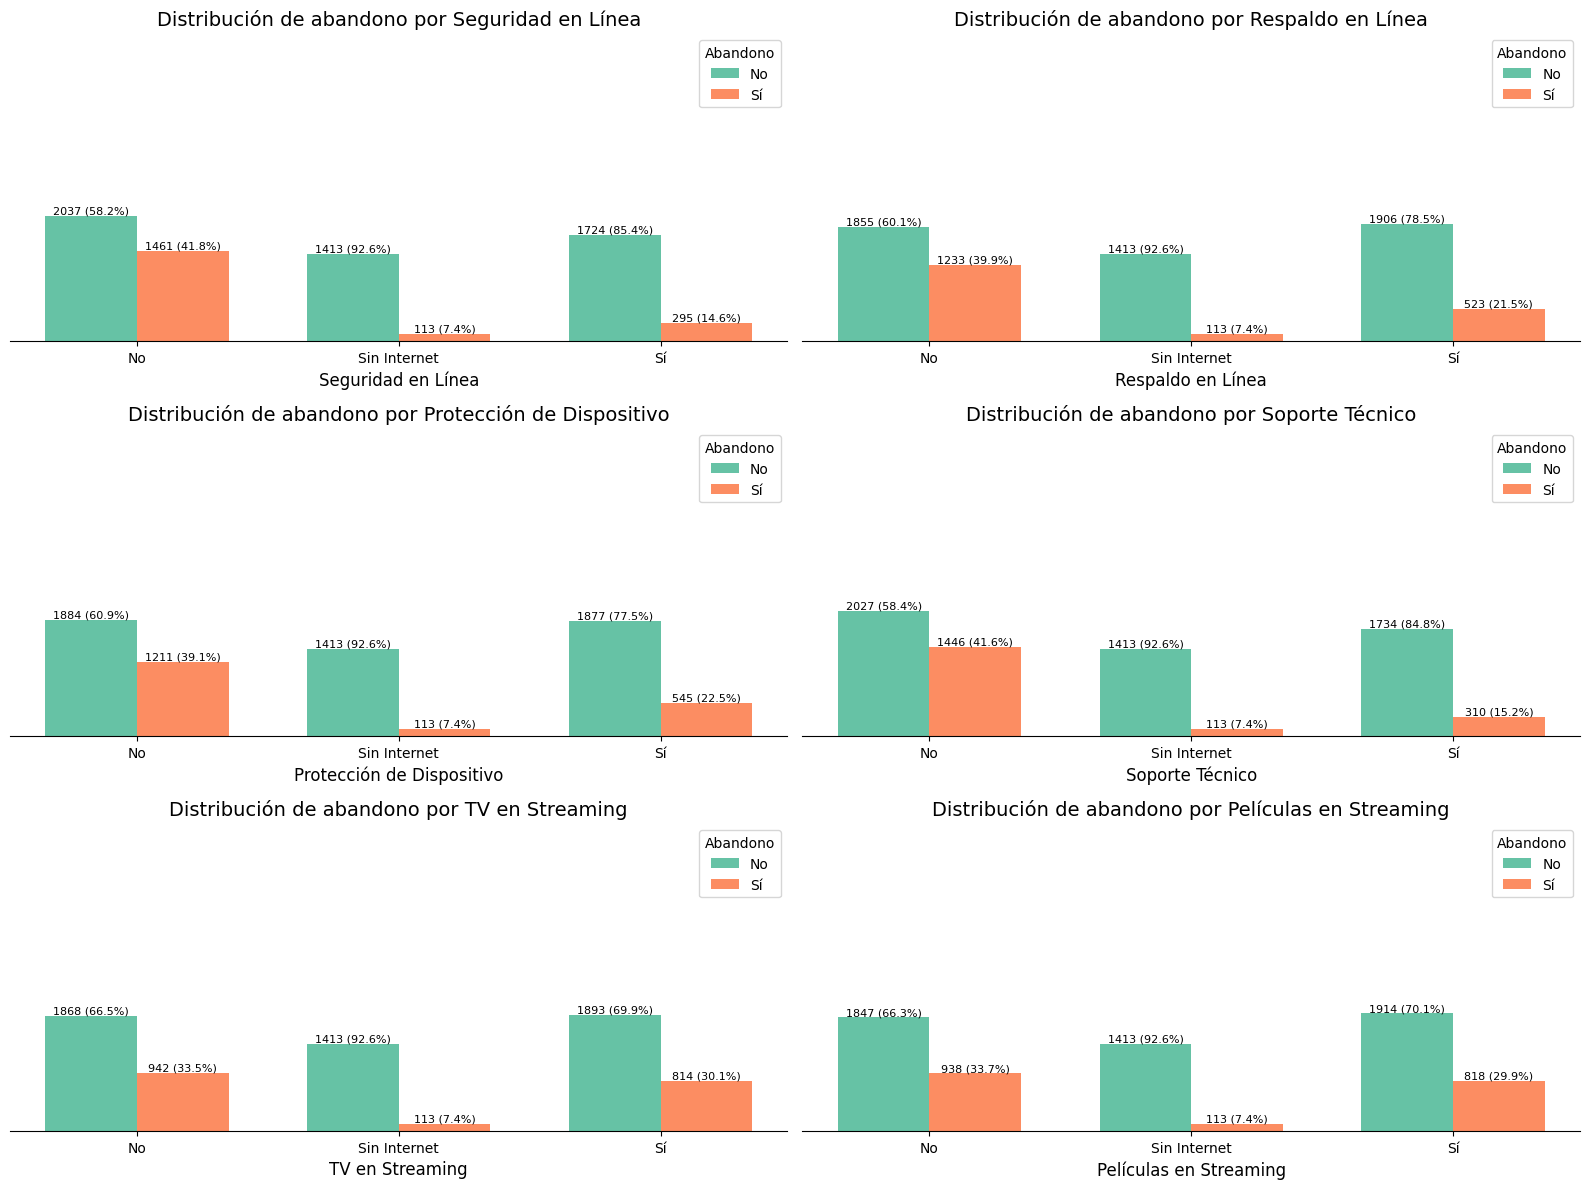

In [67]:
graficar_abandono_ohe(df, ['Seguridad en Linea', 'Respaldo en Linea', 'Protección de Dispositivo', 'Soporte Técnico', 'TV en Streaming', 'Películas en Streaming'], ['Seguridad en Línea', 'Respaldo en Línea', 'Protección de Dispositivo', 'Soporte Técnico', 'TV en Streaming', 'Películas en Streaming'])

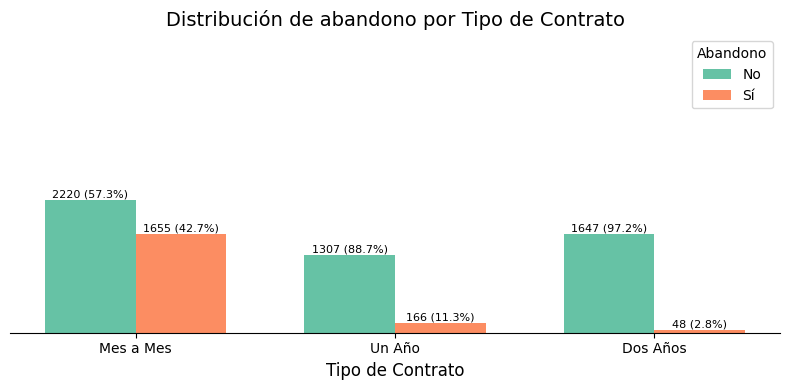

In [68]:
graficar_abandono_ohe(df, ['Contrato'], ['Tipo de Contrato'])

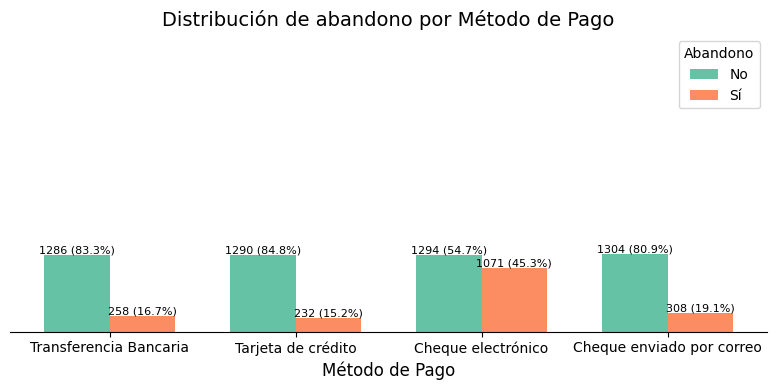

In [69]:
graficar_abandono_ohe(df, ['Método de Pago'], ['Método de Pago'])

### Conteo de evasión por variables numéricas

In [ ]:
df_numericas = df[columnas_numericas + ['Abandono']]
df_numericas.head()

,Antigüedad (meses),Cargo Mensual,Cargo Total,Cuentas Diarias,Abandono
0,9,65.6,593.3,2.186667,0
1,9,59.9,542.4,1.996667,0
2,4,73.9,295.6,2.463333,1
3,13,98.0,1274.0,3.266667,1
4,3,83.9,267.4,2.796667,1


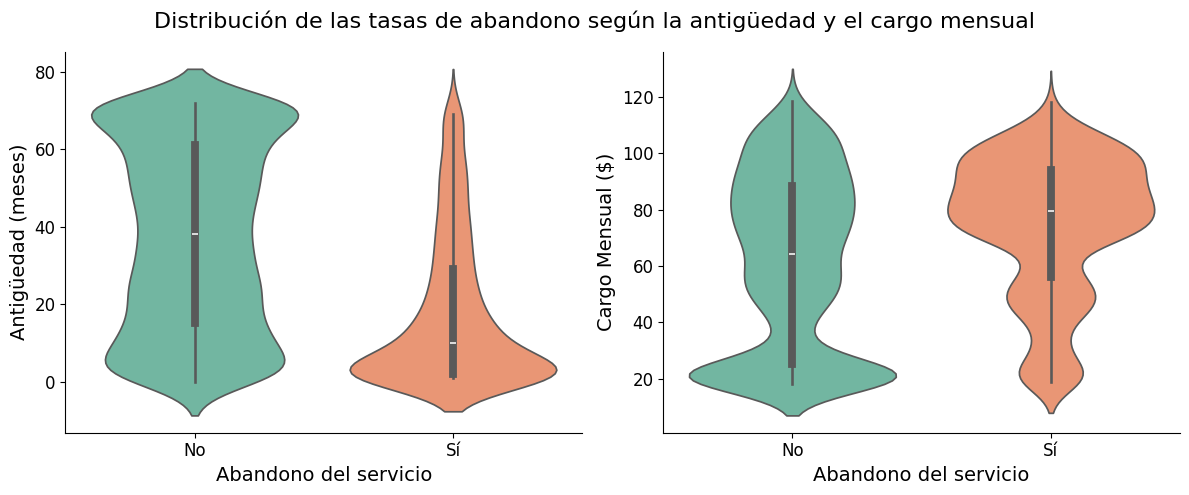

In [ ]:
# Distribución de la variable 'Antigüedad (meses)' según 'Abandono'
filtro = df['Abandono'] == 1
fig, ax = plt.subplots(1, 2,figsize=(12, 5))
fig.suptitle('Distribución de las tasas de abandono según la antigüedad y el cargo mensual', fontsize=16)

sns.violinplot(data=df_numericas, y='Antigüedad (meses)', x='Abandono', hue=filtro, ax=ax[0])
ax[0].set_xlabel('Abandono del servicio', fontsize=14)
ax[0].set_ylabel('Antigüedad (meses)', fontsize=14)
sns.set_palette('Set2')
sns.despine()
ax[0].legend_.remove()
ax[0].set_xticks([0, 1], labels=['No', 'Sí'])
ax[0].tick_params(labelsize=12)

sns.violinplot(data=df_numericas, y='Cargo Mensual', x='Abandono', hue=filtro, ax=ax[1])
ax[1].set_xlabel('Abandono del servicio', fontsize=14)
ax[1].set_ylabel('Cargo Mensual ($)', fontsize=14)
sns.set_palette('Set2')
sns.despine()
ax[1].legend_.remove()
ax[1].set_xticks([0, 1], labels=['No', 'Sí'])
ax[1].tick_params(labelsize=12)

plt.tight_layout()
plt.savefig('figuras/distribucion_abandono_numericas.png')
plt.show()

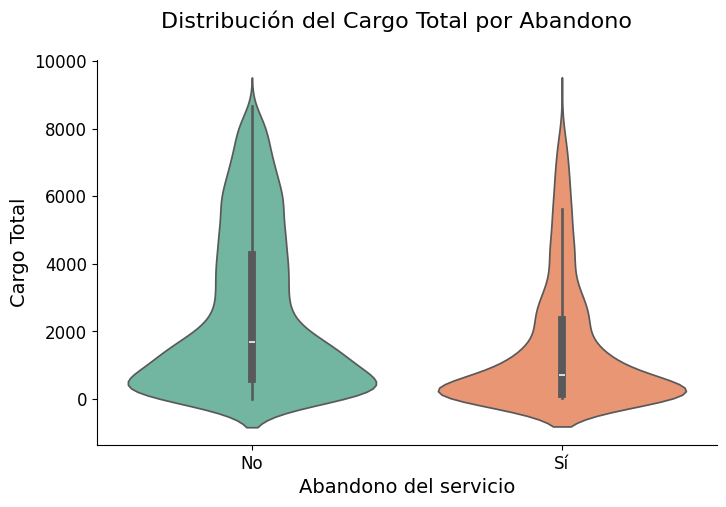

In [ ]:
# Distribución de la variable 'Cargo Total' según 'Abandono'
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Distribución del Cargo Total por Abandono', fontsize=16)
sns.violinplot(data=df_numericas, y='Cargo Total', x='Abandono', hue=filtro, ax=ax)
ax.set_xlabel('Abandono del servicio', fontsize=14)
ax.set_ylabel('Cargo Total', fontsize=14)
sns.set_palette('Set2')
sns.despine()
ax.legend_.remove()
ax.set_xticks([0, 1], labels=['No', 'Sí'])
ax.tick_params(labelsize=12)
plt.show()

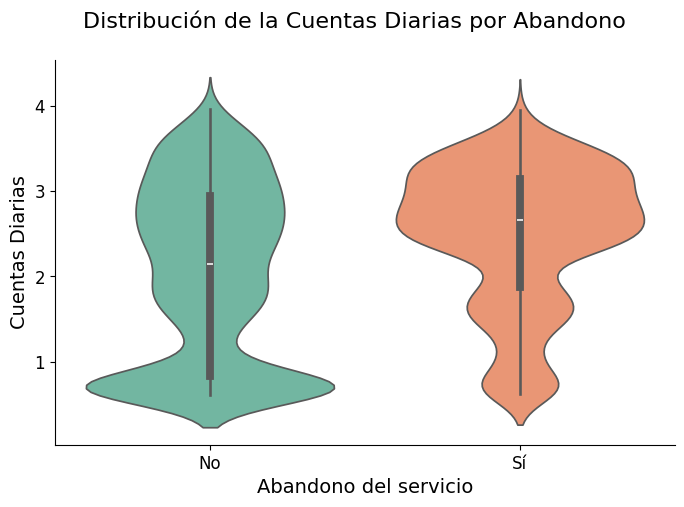

In [ ]:
# Distribución de la variable Cuentas Diarias según Abandono
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle('Distribución de la Cuentas Diarias por Abandono', fontsize=16)
sns.violinplot(data=df_numericas, y='Cuentas Diarias', x='Abandono', hue=filtro, ax=ax)
ax.set_xlabel('Abandono del servicio', fontsize=14)
ax.set_ylabel('Cuentas Diarias', fontsize=14)
sns.set_palette('Set2')
sns.despine()
ax.legend_.remove()
ax.set_xticks([0, 1], labels=['No', 'Sí'])
ax.tick_params(labelsize=12)
plt.show()

### Análisis de correlación entre variables

<Axes: >

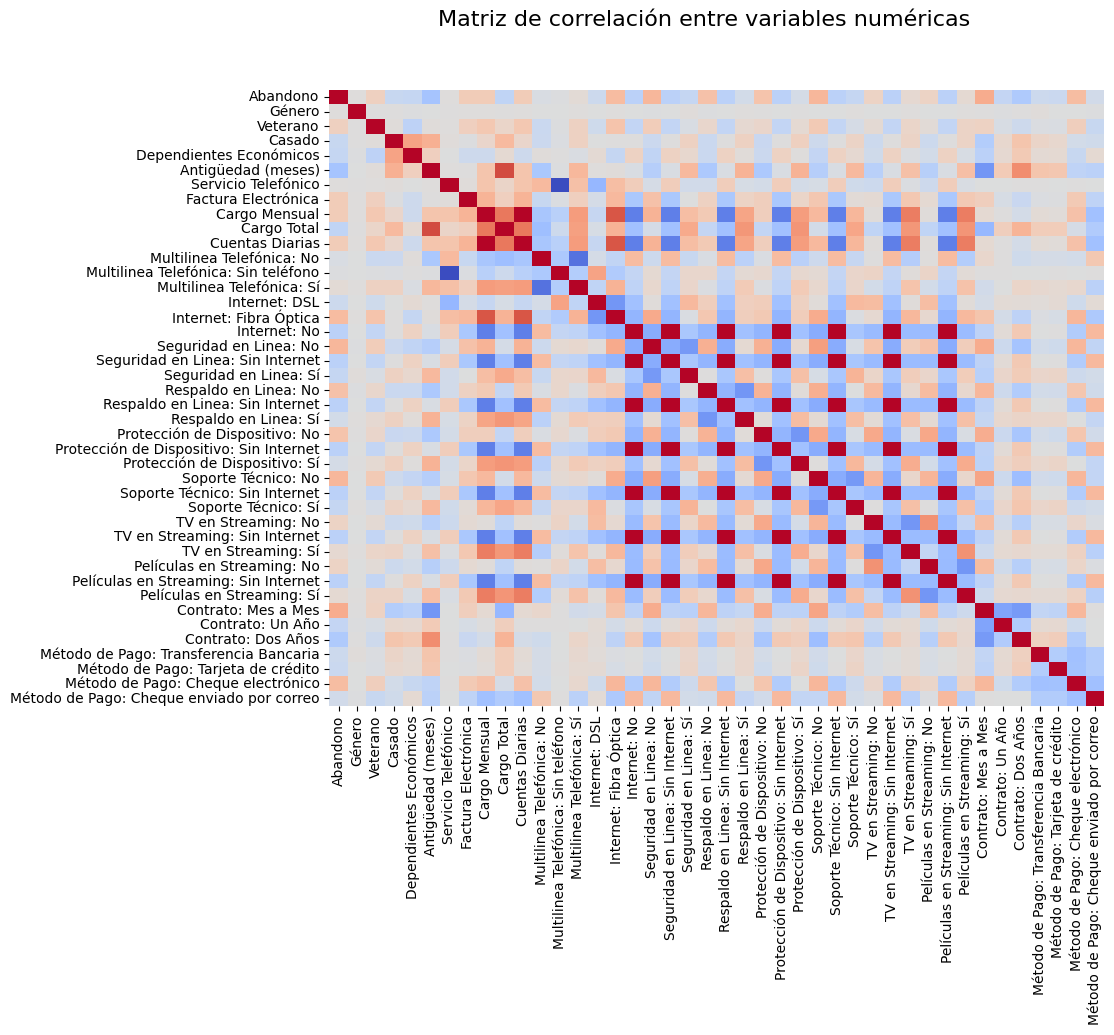

In [ ]:

fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle('Matriz de correlación entre variables numéricas', fontsize=16)
sns.heatmap(df.corr(numeric_only=True), annot=False, fmt=".2f", cmap='coolwarm', cbar=False)

In [ ]:
df.columns

Index(['ID Cliente', 'Abandono', 'Género', 'Veterano', 'Casado',
       'Dependientes Económicos', 'Antigüedad (meses)', 'Servicio Telefónico',
       'Factura Electrónica', 'Cargo Mensual', 'Cargo Total',
       'Cuentas Diarias', 'Multilinea Telefónica: No',
       'Multilinea Telefónica: Sin teléfono', 'Multilinea Telefónica: Sí',
       'Internet: DSL', 'Internet: Fibra Óptica', 'Internet: No',
       'Seguridad en Linea: No', 'Seguridad en Linea: Sin Internet',
       'Seguridad en Linea: Sí', 'Respaldo en Linea: No',
       'Respaldo en Linea: Sin Internet', 'Respaldo en Linea: Sí',
       'Protección de Dispositivo: No',
       'Protección de Dispositivo: Sin Internet',
       'Protección de Dispositivo: Sí', 'Soporte Técnico: No',
       'Soporte Técnico: Sin Internet', 'Soporte Técnico: Sí',
       'TV en Streaming: No', 'TV en Streaming: Sin Internet',
       'TV en Streaming: Sí', 'Películas en Streaming: No',
       'Películas en Streaming: Sin Internet', 'Películas en Stre

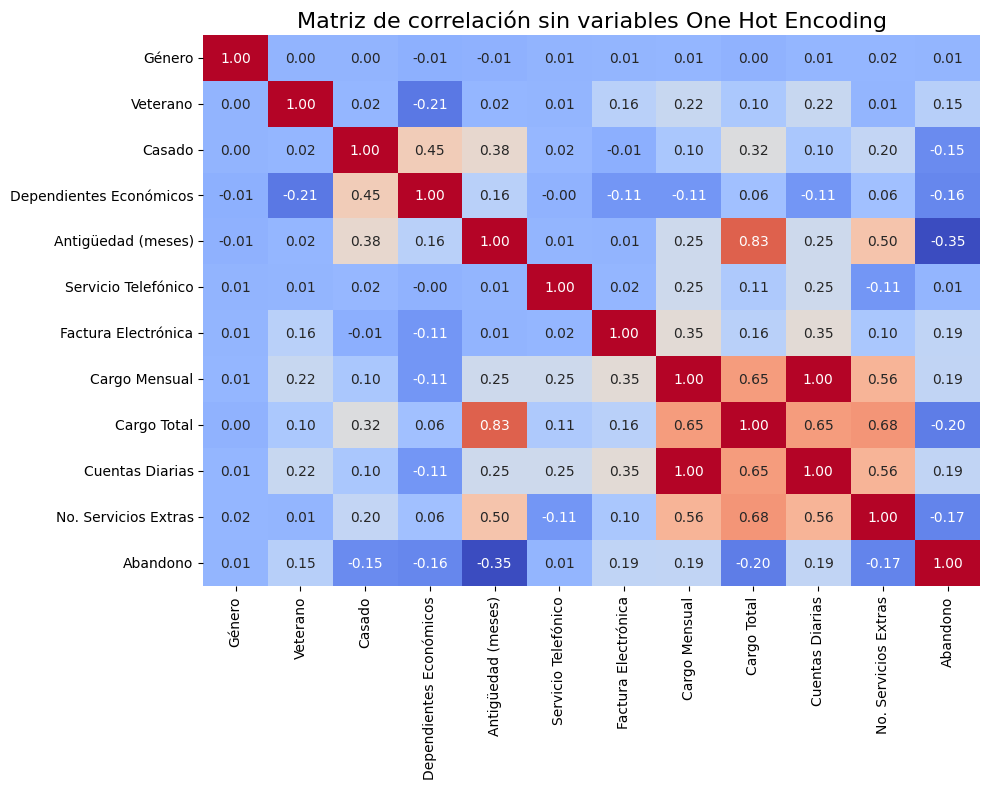

In [74]:
columnas_servicios = ['Seguridad en Linea: Sí', 'Respaldo en Linea: Sí',
       'Protección de Dispositivo: Sí', 'Soporte Técnico: Sí']
df['No. Servicios Extras'] = df[columnas_servicios].sum(axis=1)
corr_no_ohe = df[['Género', 'Veterano', 'Casado', 'Dependientes Económicos', 'Antigüedad (meses)', 'Servicio Telefónico', 'Factura Electrónica', 'Cargo Mensual', 'Cargo Total', 'Cuentas Diarias', 'No. Servicios Extras', 'Abandono']].corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Matriz de correlación sin variables One Hot Encoding', fontsize=16)
sns.heatmap(corr_no_ohe, annot=True, fmt=".2f", cmap='coolwarm', cbar=False, ax=ax)
fig.tight_layout()   
plt.savefig('figuras/grafico_correlacion_no_ohe.png', dpi=300)
plt.show()

## 📄Informe final

### Introducción

La empresa **Telecom X** busca comprender por que sus clientes estan dejando el servicio, lo que se conoce como **Churn de Clientes**, por lo que este análisis se centra principalmente en encontrar que variables son las que tienen más impacto y como estas se relacionan con la decisión de un cliente de abandonar o no abandonar el servicio.

Para este proposito se trabaja con un conjunto de datos con un total de 21 features, descritas en el archivo **TelecomX_diccionario.md**, este ademas cuenta con el registro de 7267 clientes de la empresa.

Se realizó un proceso de ETL donde se obtuvieron los datos de la API proporcionada, para su posterior limpieza y transformación para finalmente realizar un análisis  y encontrar patrónes que lleven al abandono del servicio.

### Problema


La empresa **TelecomX** sufre una tasa de abandono del servicio muy alta, esta asciende al **26.5%**, lo cual para una empresa que presta servicios es alarmante. Por lo tanto es crítico el conocer los factores que hacen más probable que un cliente abandone el servicio y como mitigarlos.

### Objetivos

- Identificar que factores influyen en la decicisión de un cliente de abandonar el servicio.
- Generar estrategías para mitigar el abandono del servicio.

### Limpieza y Tratemiento de Datos

El primer paso para trabajar con los datos de la empresa fue su obtención, estos fueron proporcionados desde una API en formato JSON obtenible [aquí](https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json). Este contaba con **6 características** y un total de **7267 registros**, sin embargo de estas 6 características se detecto que tres de ellas tenían características anidadas, por lo que se realizó la normalización del JSON para obtener un total de **21 características**. Los pasos para realizar esto se enlistan a continuación:

  1. Se realiza una petición HTTP a el URL donde se encuentra el conjunto de datos.
  2. Se carga en formato JSON el contenido de la respuesta a la solicitud HTTP.
  3. Se normalizan los datos en formato JSON.

Una vez finalizada la etapa de carga de los datos, se procedio con la transformación. El primer paso realizado fue el conocer el conjunto de datos. Como se menciono previamente el conjunto de datos consta de 21 columnas, con 7267 registros, de los cuales los tipos de datos se distribuyen de la siguiente manera:

- Datos numéricos: 3 (Dos enteros y uno de coma flotante)
- Datos de cadenas de texto: 18

De estos tipos de datos, el de la columa ```Cargos Totales``` se trata en realidad de valores numéricos, pero por inconsistencias mencionadas y solucionadas más adelante inicialmente era considerado como cadena de texto.

Para cada una de las categorías se analizaron los valores unicos, dando como resultado lo siguiente:

- Existen 6 categorías que tienen valores de sí o no, estas son: 
  - `Abandono`
  - `Veterania`
  - `Casado`
  - `Dependientes Económicos`
  - `Servicio Telefónico`
  - `Factura Electrónica`
- Otra característica binaria dentro del conjunto de datos es la de `Género` con los valores `Femenino` y `Masculino`.
- También como características categóricas tenemos las siguientes con sus respectivos valores únicos:
  - `Múltilinea telefónica` con las categorías `No`, `Sin teléfono` y `Sí`.
  - `Internet` que tiene como categorías `DSL`, `Fibra Óptica` y `No`.
  - Hay varios servicios extra que estan dispobles solo si se tiene servicio de internet, por lo que tiene de categorías `Sí`, `Sin Internet` y `No`. Estas caracterìsticas son:
    - `Seguridad en Linea`
    - `Respaldo en Linea`
    - `Protección de Dispositivo`
    - `Soporte Técnico`
    - `TV en Streaming`
    - `Películas en Streaming`
  - `Contrato` tiene como categorías `Mes a Mes`, `Un Año` y `Dos Años`.
  - `Método de Pago` tiene como categorías `Transferencia Bancaria`, `Tarjeta de crédito`, `Cheque electrónico` y `Cheque enviado por correo`.
- Finalmente se cuenta con dos características numéricas, las cuales son:
  - `Cargo Mensual` con valores de entre *18.25* y *118.75*.
  - `Cargo Total` con valores entre *0* y *999.9*.

Como siguiente tarea realizada, se comprobaron incoherencias en los datos como mal formato, valores incorrectos, valores faltantes o atípicos, encontrando lo siguiente:
- Para `Abandono` se encontraron *224* valores faltantes.
- Por su parte `Costo Total` contaba con 11 valores faltantes.

Para corregir las inconsistencias en los datos para `Abandono` se optó por eliminar los registros faltantes, ya que es un valor que no se puede calcular de manera certera en base a los otros, y como es la característica objetivo puede meter ruido en el análisis el calcularla en base a otras. Por su parte para `Costo Total` se llenaron los datos faltantes mediante la multiplicación de los valores de `Antigüedad (meses)` y `Costo Mensual`.

Se agregó una columna de cuentas diarias para poder visualizar de manera más directa el costo díario que tiene el servicio para los clientes, este se realizó dividiendo sobre 30 el `Costo Mensual`.

Para facilitar el modelado de las características categóricas, se transformaron a valores numéricos. Las variables binarias cuyos valores son `Yes` y `No` se mapearon a `Yes = 1` y `No = 0`, estas son `Abandono`, `Casado`, `Dependientes Económicos`, `Servicio Telefónico` y `Cargo Total`. De igual manera la característica `Género` tambièn es binaria, por lo que sus valores se mapearon a `Female = 1` y `Male = 0`. El conjunto de datos incluye 10 variables categóricas que no son binarias, estas son `Multilinea Telefónica`, `Internet`, `Seguridad en Linea`, `Respaldo en Linea`, `Protección de Dispositivo`, `Soporte Técnico`, `TV en Streaming`, `Películas en Streaming`, `Contrato` y `Método de Pago`. A estas 10 variables se les ha transformado utilizando el método One Hot Encoding para facilitar su análisis, ya que transformarlos simplemente a valores numéricos puede introducir una relación numérica artificial.

Finalmente, para facilitar la comprensión de las características del conjunto de datos, se tradujo su nombre de inglés a español. La traducción se realizó como se muestra en la siguiente lista:

- `customerID`: `ID Cliente`
- `Churn`: `Abandono`
- `customer.gender`: `Género`
- `customer.SeniorCitizen`: `Veterano`
- `customer.Partner`: `Casado`
- `customer.Dependents`: `Dependientes Económicos`
- `customer.tenure`: `Antigüedad (meses)`
- `phone.PhoneService`: `Servicio Telefónico`
- `account.PaperlessBilling`: `Factura Electrónica`
- `account.Charges.Monthly`: `Cargo Mensual`
- `account.Charges.Total`: `Cargo Total`
- `cuentas_diarias`: `Cuentas Diarias`
- `phone.MultipleLines_No`: `Multilinea Telefónica: No`
- `phone.MultipleLines_No phone service`: `Multilinea Telefónica: Sin teléfono`
- `phone.MultipleLines_Yes`: `Multilinea Telefónica: Sí`
- `internet.InternetService_DSL`: `Internet: DSL`
- `internet.InternetService_Fiber optic`: `Internet: Fibra Óptica`
- `internet.InternetService_No`: `Internet: No`
- `internet.OnlineSecurity_No`: `Seguridad en Linea: No`
- `internet.OnlineSecurity_No internet service`: `Seguridad en Linea: Sin Internet`
- `internet.OnlineSecurity_Yes`: `Seguridad en Linea: Sí`
- `internet.OnlineBackup_No`: `Respaldo en Linea: No`
- `internet.OnlineBackup_No internet service`: `Respaldo en Linea: Sin Internet`
- `internet.OnlineBackup_Yes`: `Respaldo en Linea: Sí`
- `internet.DeviceProtection_No`: `Protección de Dispositivo: No`
- `internet.DeviceProtection_No internet service`: `Protección de Dispositivo: Sin Internet`
- `internet.DeviceProtection_Yes`: `Protección de Dispositivo: Sí`
- `internet.TechSupport_No`: `Soporte Técnico: No`
- `internet.TechSupport_No internet service`: `Soporte Técnico: Sin Internet`
- `internet.TechSupport_Yes`: `Soporte Técnico: Sí`
- `internet.StreamingTV_No`: `TV en Streaming: No`
- `internet.StreamingTV_No internet service`: `TV en Streaming: Sin Internet`
- `internet.StreamingTV_Yes`: `TV en Streaming: Sí`
- `internet.StreamingMovies_No`: `Películas en Streaming: No`
- `internet.StreamingMovies_No internet service`: `Películas en Streaming: Sin Internet`
- `internet.StreamingMovies_Yes`: `Películas en Streaming: Sí`
- `account.Contract_Month-to-month`: `Contrato: Mes a Mes`
- `account.Contract_One year`: `Contrato: Un Año`
- `account.Contract_Two years`: `Contrato: Dos Años`
- `account.PaymentMethod_Bank transfer (automatic)`: `Método de Pago: Transferencia Bancaria`
- `account.PaymentMethod_Credit card (automatic)`: `Método de Pago: Tarjeta de Crédito`
- `account.PaymentMethod_Electronic check`: `Método de Pago: Cheque electrónico`
- `account.PaymentMethod_Mailed check`: `Método de Pago: Cheque enviado por correo`

### Análisis descriptivo

El conjunto de datos final con el que se realizó el análisis cuenta con un total de **43** características y **7043** registros, de los cuales **5174** corresponden a clientes que no dejaron el servicio y **1869** a clientes que **si abandonaron** el servicio. Esto representa un **26.5%** del total de clientes registrados como se puede ver en la gráfica siguiente.

![Distribución de abandono del servicio](./figuras/grafico_distribución_abandono.png)

Podemos observar que el conjunto de datos esta compuesto por un **50.47%** de hombres, lo cual hace que este muy balanceado. La tasa de abandonos entre ambos géneros también es muy similar, siendo de menos de 1% la diferencia entre ambos como se puede observar en la gráfica.

![Distribución de abandono por Género](./figuras/grafico_abandono_Género.png)

Del total de registros **5901** registros no son veteranos, lo que deja solamente con un **16.21%** de los registros siendo veteranos. Aquí podemos ver algo interesante, ya que casí la mitad de los clientes que son veteranos abandonan el servicio, mientras que los que no lo son tienen una tasa de abandono significativamente más baja.

![Distribución de abandono por Veterano](./figuras/grafico_abandono_Veterano.png)

También se puede observar que solamente un **48.30%** de los usuarios del servicio se encuentran casados y un **29.96%** tiene dependientes económicos.

![Distribución de abandono por Casado y Dependientes Económicos](./figuras/grafico_abandono_Casado_Dependientes%20Económicos.png)

La antigüedad media de los clientes es de **32.37** meses, teniendo como antigüedad máxima 72 meses. Por su parte, el cargo mensual medio es de **$64.76** con un valor mínimo de **$18.25** y uno máximo de **$118.75**. Esto nos da una muy buena idea de dos de los factores que pueden influir en la decisión del usuario de abandonar el servicio, ya que en los primeros meses es más probable que esto ocurra, y un precio elevado también lleva al abandono como podemos observar.

![Distribución de las tasas de abandono según la antigüedad y el cargo mensual](./figuras/distribucion_abandono_numericas.png)

Podemos observar es que los usuarios que cuentan con servicio de internet por fibra óptica presentan una tasa de abandono de mas del doble con respecto a los que tienen internet por DSL y casí seis veces más alto respecto a los que no cuentan con servicio de internet. Esto nos indica un problema con el servicio que hay que tratar.

![Distribución de abandono por Servicio de Internet](./figuras/grafico_abandono_Servicio%20de%20Internet.png)

Los servicios adicionales también juegan un rol a la hora de que un cliente pueda abandonar el servicio, ya que en especial con los de `Seguridad en Linea`, `Respaldo en Linea`, `Protección de Dispostivo` y `Soporte Técnico` si el cliente no cuenta con ellos es más probable que abandone el servicio en comparación con los clientes que los tienen contratados. Por su parte los servicios de Streaming parecen no hacer una diferencia relevante.

![Distribución de abandono por servicios adicinales](./figuras/grafico_abandono_Seguridad%20en%20Línea_Respaldo%20en%20Línea_Protección%20de%20Dispositivo_Soporte%20Técnico_TV%20en%20Streaming_Películas%20en%20Streaming.png)

Otro detalle a destacar es la gran diferencia que el tipo de contrato hace a la hora de abandonar o permanecer en el servicio, ya que los clientes que tienen un contrato mes a mes es mucho más probable que lo abandonen, mientras que los que tienen un contrato de un año es muy baja la tasa de abandonos y los que tienen contrato por dos años es mínima la posibilidad de abandono del servicio.

![Distribución de abandono por tipo de contrato](./figuras/grafico_abandono_Tipo%20de%20Contrato.png)

El método de pago también influye en la decisión de abandonar el servicio, donde el cheque electrónico presenta más del doble de tasa de abandono con respecto a los otros métodos de pago, con un **45.3%** de abandono para este.

![Distribución de abandono por Método de Pago](./figuras/grafico_abandono_Método%20de%20Pago.png)

Finalmente, podemos confirmar la correlación fuerte de la antigüedad con los abandonos, por lo que es en lo que hay que crear un especial enfoque para mejorar la tasa de retención de clientes. El cargo mensual, la facturación electrónica y los servicios extra también juegan un papel importante pero en menor medida.

![Correlación de las características del conjunto de datos](./figuras/grafico_correlacion_no_ohe.png)

### Insights Principales

Basado en el análisis exploratorio de datos, se han identificado los siguientes factores que son determinantes en la retención de clientes:

1. **La Antigüedad es el factor crítico**:
    - Existe una **fuerte correlación** entre la antigüedad y la tasa de abandono. Los clientes nuevos (mayormente durante los primeros seis meses) son los más propensos a cancelar el servicio. La probabilidad de fuga va disminuyendo drásticamente con el tiempo, denotando un aumento en la fidelidad.
2.  **El impacto del método de pago**:
    - Se detectó una anomalía significativa con el método de pago "Cheque Electrónico", el cual presenta una tasa de abandono del **45.3%**, siendo más del doble que cualquier otro método de pago.
3. **Vulnerabilidad en el segmento "Veteranos"**:
    - Este grupo demográfico muestra una propensión al abandono superior al promedio. Aunque su proporción respecto al total de clientes es menor, su alta tasa de fuga requiere especial atención.
4. **Tipo de contrato**:
    - Los clientes que tienen un contrato de "Mes a Mes" son extremadamente volatiles en comparación con aquellos que tienen un contrato a largo plazo de uno o dos años. La falta de este compromiso facilita una fuga inmediata ante cualquier insatisfacción o mejor oferta por parte de la competencia.
5. **Costo mensual y servicios adicionales**:
    - Se observa que los clientes con cargos mensuales más altos estan asociados con una mayor probabilidad de fuga, esto puede ser debido a los clientes con servicios de fibra óptica, que suelen ser mas costosos y tienen una mayor competencia.
    - Además los clientes que no contratan serviciós adicionales de protección como el Soporte Técnico, Seguridad en Línea o Backup, tienden a irse más. Estos servicios actúan como un "ancla", aumentando la dependencia y el valor percibido del servicio principal.
6. **Facturación Electrónica**:
    - Curiosamente, los usuarios suscritos a la facturación electrónica muestran una tasa de abandono mayor que quienes reciben la factura en papel. Esto podría correlacionarse con un perfil de usuario más digital y propenso a comparar ofertas online.


### Recomendaciones

1. Programa *"Primeros Pasos"*
    - **Descuentos escalonados**: En lugar de ofrecer un solo descuento durante el primer mes, ofrecer descuentos que disminuyan gradualmente durante los primeros 6 meses para incentivar a que el cliente permanezca hasta cruzar el "umbral de riesgo".
    - **Onboarding de velocidad**: Ofrecer velocidad aumentada a la que se contrata durante los primeros meses, ofreciendo la opción a mantenerla si se firma un contrato anual después.
2. Migrar los métodos de pago
    - **Incentivo por autopago**: Ofrecer un descuento fijo o velocidad adicional a quienes domicilien su pago con transferencias bancarias o tarjetas de crédito. Esto hace que la fricción al pagar sea menor que al hacerlo manual, donde el cliente puede reconsiderar si seguir pagando o cancelar.
    - **Alerta de valor**: Para los usuarios que utilizan la facturación electrónica, rediseñar el correo de factura. Que no sea solo un mensaje de "tienes que pagar", sino un resumen del valor mensual: "Este mes descargaste X GB, te ahorraste tanto tiempo comparado con la velocidad promedio, etc."
3. Atención al segmento "Veteranos"
    - **Membresía adecuada al segmento**: Crear un plan que incluya soporte técnico telefónico prioritario. El análisis mostraba un aumento en el abandono con la fata de soporte técnico, por lo que el tenerlo disponible en este sector demográfico puede ser un plus importante.
4. Fidelización contractual
    - **Garantía de precio**: Ofrecer a los usuarios con contrato "Mes a Mes" la opción de cambiar a un contrato de un año garantizando el mantener el precio durante ese periodo, ya que la incertidumbre de subidas de precio es un factor que puede alejar a los clientes sin contrato.
5. Ecosistema de Protección
    - **Bundles de seguridad**: Incluir "Seguridad Online" y "Soporte Técnico" de manera gratuita durante los primeros meses en los paquetes básicos, para que una vez configurados los servicios, mentalmente es más costoso para el usuario el cambiarse a otra compañia.

### Conclusiones

El análisis de datos realizado a **Telecom X** ha revelado que la fuga de clientes no es un fenómeno aleatorio, sino que este es resultado de fricciones específicas en la experiencia de usuario y la estructura de contratación.

La evidencia es contundente: la lealtad se construye durante los primeros meeses. La correlación crítica entre la **baja antigüedad** y una **alta fuga** indica que la empresa esta fallando durante la etapa de *onboarding*. Si el cliente supera la barrera de los seis meses, la probabilidad de que este permanezca se dispara. Por esto es crucial el blindar este periodo inicial.

Otro factor que esta sangrando la base de usuarios se concentra en uno de los métodos de pagos, el **cheque electrónico**. Este cuenta con una tasa de abandono superior al **45%** representa un obstaculo silencioso. El migrar a los usuarios que utilizan este medio de pago hacia pagos automáticos no es solo una mejora financiera, sino que representa una estrategia de retención fundamental. Además el dominio de los contratos "Mes a Mes" en la tasa de abandono sugiere que la flexibilidad, que puede ser atractiva para la venta, es un componente letal para la retención. La estrategia de la empresa debe reestructurar sus incentivos para que el contrato anual sea la opción lógica y preferida por los clientes, ofreciendo valor a cambio de lealtad.

Telecom X tiene un producto competitivo, pero el modelo comercial actual favorece la rotación de clientes. La estrategia actual no debe centrarse en captar más clientes, sino en **dejar de perderlos**. Implementar programas con incentivos iniciales y solucionar fricciones como el pago con cheque electrónico ofrecerá un retorno de inversión más rápido y efectivo para la compañia.